In [5]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def f1(x):
    return 1/(1+25*np.power(x,2))

In [7]:

def lagrange_interpolation(x, y, x_interp):
    n = len(x)
    m = len(x_interp)
    y_interp = np.zeros_like(x_interp)

    for i in range(m):
        for j in range(n):
            l = 1
            for k in range(n):
                if k != j:
                    l *= (x_interp[i] - x[k]) / (x[j] - x[k])
            y_interp[i] += y[j] * l

    return y_interp

In [8]:

def cubic_spline_interpolation(x, y, x_interp):
    cs = CubicSpline(x, y)
    y_interp = cs(x_interp)
    return y_interp

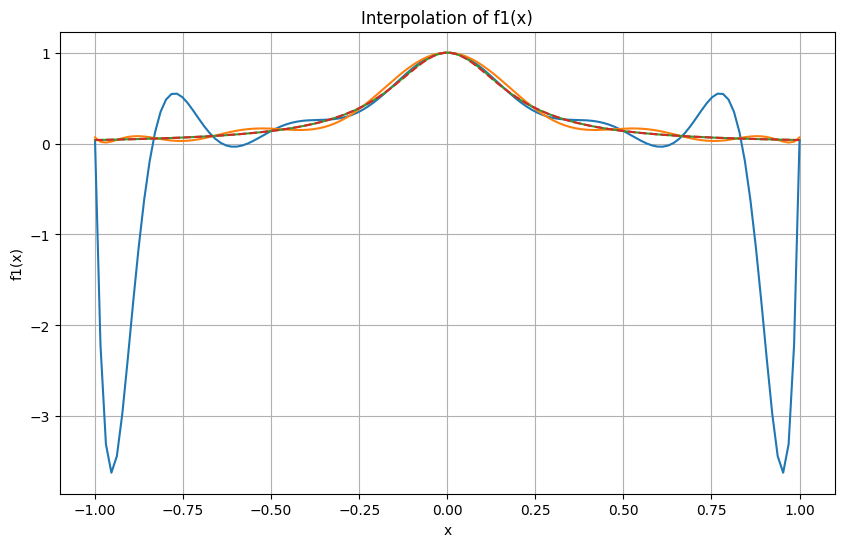

In [9]:
n = 12
x0, xn = -1, 1
h = (xn - x0) / n

x_equidistant = np.linspace(x0, xn, n+1)
y1_equidistant = f1(x_equidistant)

x_chebyshev = np.cos((2 * np.arange(n+1) + 1) * np.pi / (2 * (n+1)))
y1_chebyshev = f1(x_chebyshev)

x_interp = np.linspace(x0, xn, 10 * (n+1))
y1_interp_lagrange_equidistant = lagrange_interpolation(x_equidistant, y1_equidistant, x_interp)

y1_interp_lagrange_chebyshev = lagrange_interpolation(x_chebyshev, y1_chebyshev, x_interp)
y1_interp_cubic_spline = cubic_spline_interpolation(x_equidistant, y1_equidistant, x_interp)

plt.figure(figsize=(10, 6))
plt.plot(x_interp, y1_interp_lagrange_equidistant, label='Lagrange (Equidistant Nodes)')
plt.plot(x_interp, y1_interp_lagrange_chebyshev, label='Lagrange (Chebyshev Nodes)')
plt.plot(x_interp, y1_interp_cubic_spline, label='Cubic Spline')
plt.plot(x_interp, 1/(1 + 25 * x_interp ** 2), label='Original Function', linestyle='--')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.title('Interpolation of f1(x)')
plt.grid(True)
plt.show()